# Five qubit error correcting code

This notebook explains our Qiskit implementation of the five qubit error correcting code with a random Pauli error channel.

**Outline**
1. Basic explanation of the five qubit error correcting code
2. State preparation
3. Random Pauli error
4. Measuring syndromes
5. Applying recovery operations
6. Simulating the entire circuit with various error probabilities

In [1]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, AncillaRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit import transpile

import matplotlib.pyplot as plt
import numpy as np
import five_qubit_ecc

## The five qubit error correcting code

## State preparation

## Applying random Pauli errors to the logical state

## Measuring syndromes

## Applying recovery operations

## Simulating the circuit

We now want to simulate our circuit for the five qubit error correcting code. 
In particular, we want to visualize the relationship between the error probability $p$ and the probability of successfully measuring a component of the logical state $|x_L\rangle$.

First, let us visualize the circuit itself.
Running the cell below will generate a circuit with random Pauli errors. 
Each time the cell is run, a new circuit will be generated, with possibly new Pauli errors, but the errors will be contained in the `error channel` gate, so cannot be seen in the drawing below.

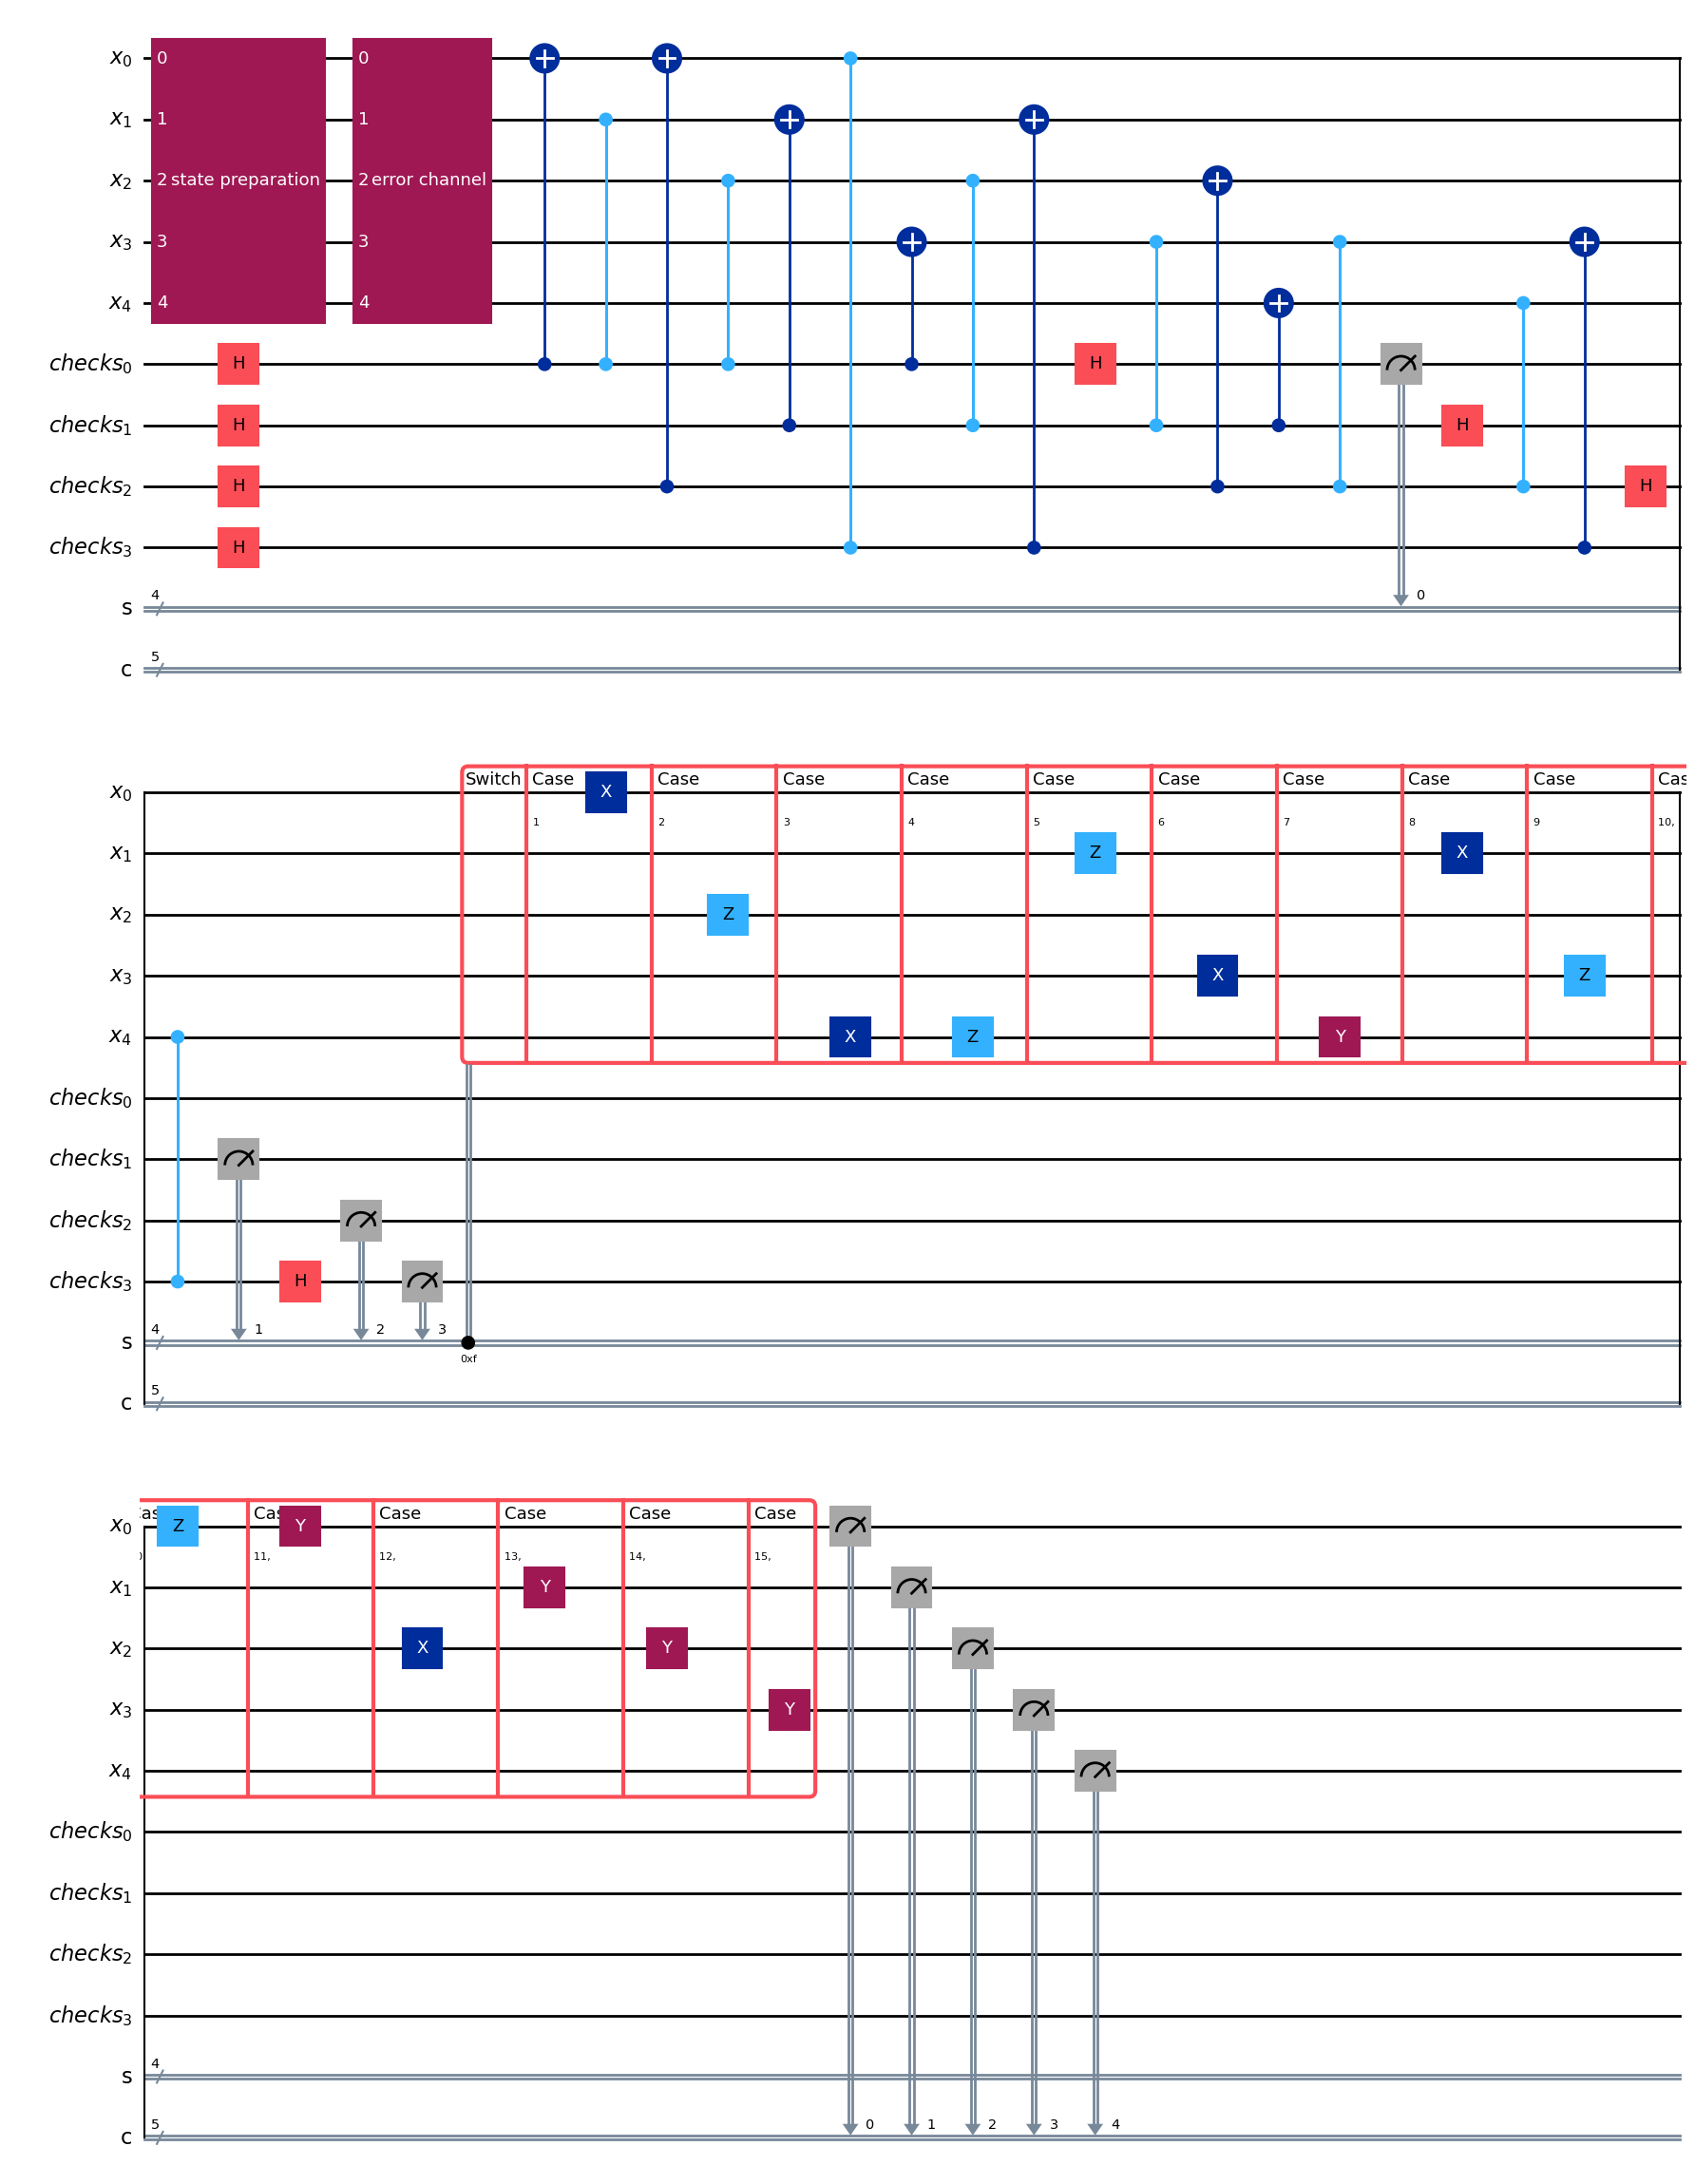

In [3]:
# Parameters for the main circuit
x = False
p = 0.05

# Draw the main circuit
five_qubit_ecc.main_circuit(x,p).draw("mpl")

Consider the following probabilities.
- The probability that all five physical qubits of the logical state acquire no errors when going through the random Pauli error channel is $(1-3p)^5$.
- The probability that one or fewer physical qubits acquires an error is $(1-3p)^5 + 5 (1-3p)^4 (3p)$.

We know that the five qubit error correcting code can correct arbitrary 1-qubit errors, but cannot correct larger errors.
Thus, the probability that the logical state acquires a correctable error (including no error) is $(1-3p)^5 + 5 (1-3p)^4 (3p)$.
Let us plot this below.

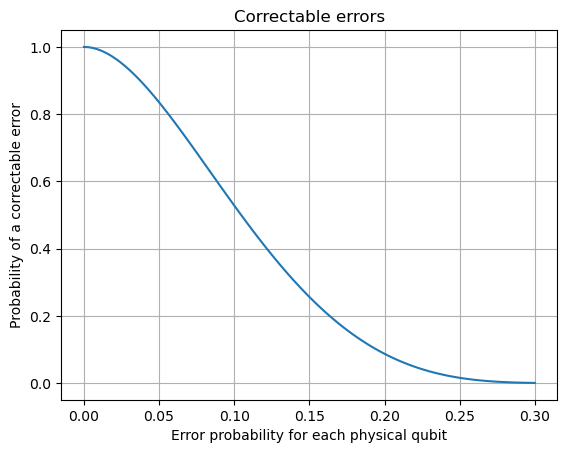

In [10]:
p = np.linspace(0,0.3,100)
prob = np.power(1-3*p, 5) + 15*p*np.power(1-3*p,4)
plt.plot(p, prob)
plt.xlabel("Error probability for each physical qubit")
plt.ylabel("Probability of a correctable error")
plt.title("Correctable errors")
plt.grid(True)
plt.show()

When $p \approx 0$, the errors are very likely to be correctable, so we expect to measure a correct component of the logical state $|x_L\rangle$.
However, as $p \to \frac{1}{3}$ from the left, the probability of a correctable error tends to zero, so we expect to measure a correct component about 50% of the time.

Now we will simulate the circuit many times. Feel free to run the following cells a few times if you'd like to redo the simulations.

In [ ]:
# Parameters for simulations
x = False
probs = [0.025 * x for x in range(1,13)]    # List of error probabilities
num_sims = 250                              # Number of simulations for each element of `probs`

# Simulation results as a dictionary
# On my device, it takes 80 s to do 1000 simulations
# With the above parameters, the 3000 simulations should take about 4 min
results = five_qubit_ecc.simulation_results(x=x,probs=probs,num_sims=num_sims)

In [ ]:
plt.plot(*zip(*sorted(results.items())))
plt.xlabel("Error probability for each physical qubit")
plt.ylabel("Probability of measuring to a correct component")
plt.title("Simulation results")
plt.grid(True)
plt.show()

In [ ]:
# New dictionary where each key is the probability that a physical qubit is error-free
results_alt = dict()
for key in results:
    results_alt.update({1-3*key, results.get(key)})

plt.plot(*zip(*sorted(results_alt.items())))
plt.xlabel("Probability that a given physical qubit is error-free")
plt.ylabel("Probability of measuring to a correct component")
plt.title("Simulation results")
plt.grid(True)
plt.show()

Let's simulate the circuit again, this time for smaller values of $p$.

In [7]:
# Parameters for simulations
x = True
probs = [0.005 * x for x in range(1,21)]    # List of error probabilities
num_sims = 250                              # Number of simulations for each element of `probs`

# Simulation results as a dictionary
# On my device, it takes 80 s to do 1000 simulations
# With the above parameters, the 5000 simulations should take about 6 min 40 s
results_small_p = five_qubit_ecc.simulation_results(x=x,probs=probs,num_sims=num_sims)

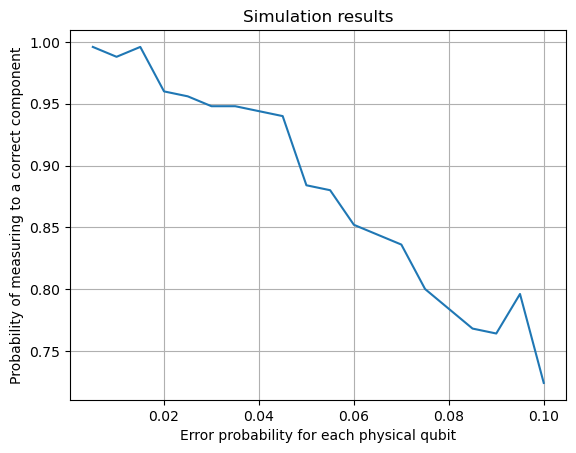

In [8]:
plt.plot(*zip(*sorted(results_small_p.items())))
plt.xlabel("Error probability for each physical qubit")
plt.ylabel("Probability of measuring to a correct component")
plt.title("Simulation results")
plt.grid(True)
plt.show()

Let us compare some of these experimental results with the known probability of a correctable error.

First, let's consider a very low error, say $p=0.04$.
- In our experiment, when $p = 0.04$, the probability of measuring to a correct component of $|x_L\rangle$ is a bit less than $0.95$.
- Plugging $p=0.04$ into $(1-3p)^5 + 5 (1-3p)^4 (3p)$, we find that the probability of acquiring a correctable error is about $0.8875$.
- If we don't get a correctable error, and we assume that a non-correctable error has a 50% chance of being measured to a correct component, then we get $0.8875 + 0.1124*0.5 \approx 0.9438$, which is similar to what we see in our experiment.

Next, let's consider a more sizeable error, say $p=0.08$.
- In our experiment, the probability of a correct measurement drops to below $0.80$. It looks like $0.78$.
- Plugging $p=0.08$ into $(1-3p)^5 + 5 (1-3p)^4 (3p)$, we find that the probability of acquiring a correctable error is about $0.6539$.
- Again, assuming that a noncorrectable error has a 50% chance of a correct measurement, we get $0.6539 + 0.3461 * 0.5 \approx 0.8369$, which is somewhat greater than our experimental result.